# Sum of squared deviations

**TL;DR** Comparison of approaches

In [2]:
from numba import jit
import numpy as np
import pandas as pd
from numpy import sum, power, mean
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 8)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
@jit(nopython=True)
def sum_sq_dev(x):
    return sum(power(x - mean(x), 2))

In [4]:
@jit(nopython=True)
def sum_sq_dev_experimental(x):
    population_mean = mean(x)
    total = 0.0

    for value in x:
        total += power((value - population_mean), 2)

    return total

In [5]:
x = np.random.randn(1000)

In [6]:
np.testing.assert_almost_equal(sum_sq_dev(x), sum_sq_dev_experimental(x))  # Basic sanity test

In [7]:
results = []

for exponent in range(7):
    population_size = 10**exponent
    x = np.random.randn(population_size)
    timings_v1 = %timeit -o sum_sq_dev(x)
    timings_v2 = %timeit -o sum_sq_dev_experimental(x)
    np.testing.assert_almost_equal(sum_sq_dev(x), sum_sq_dev_experimental(x))
    results.append((population_size, timings_v1.best, timings_v2.best))

The slowest run took 12.79 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 463 ns per loop
The slowest run took 10.28 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 346 ns per loop
The slowest run took 5.93 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 466 ns per loop
The slowest run took 11.84 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 334 ns per loop
The slowest run took 4.91 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 724 ns per loop
The slowest run took 7.88 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 551 ns per loop
The slowest run took 8.12 times longe

,sum_sq_dev,sum_sq_dev_experimental
population_size,,
1,0.000463,0.000346
10,0.000466,0.000334
100,0.000724,0.000551
1000,0.003164,0.002926
10000,0.027611,0.025958
100000,0.291489,0.257195
1000000,5.694846,2.621306


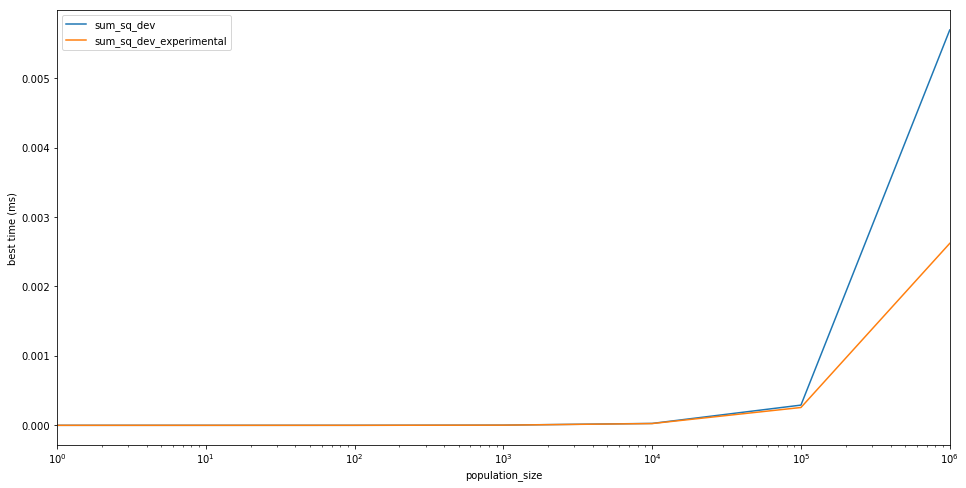

In [8]:
df = pd.DataFrame(np.array(results), columns=['population_size', 'sum_sq_dev', 'sum_sq_dev_experimental'])
df.population_size = df.population_size.astype(int)
df = df.set_index('population_size')
df.apply(lambda x: x * 1000)

df.plot(logx=True);
plt.ylabel('best time (ms)')